In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
x=np.linspace(0,10)

In [3]:
y=30*np.sin(x)+np.random.normal(0,0.6,len(x))

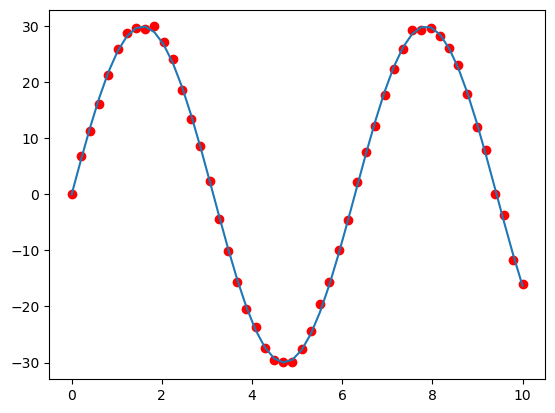

In [4]:
plt.plot(x,y,'ro')
plt.plot(x,30*np.sin(x))

In [5]:
f=lambda x,a,b,c:a*np.cos(b*x+c)

In [6]:
ans,cov=sp.optimize.curve_fit(f,x,y,[20,1.1,0])

In [7]:
cov

array([[ 1.69041011e-02,  1.49694856e-05, -9.78198560e-05],
       [ 1.49694856e-05,  1.70604033e-06, -8.83513575e-06],
       [-9.78198560e-05, -8.83513575e-06,  6.24492601e-05]])

In [8]:
ans

array([29.90824156,  1.00025203, -1.56798543])

In [9]:
yFit=f(x,ans[0],ans[1],ans[2])

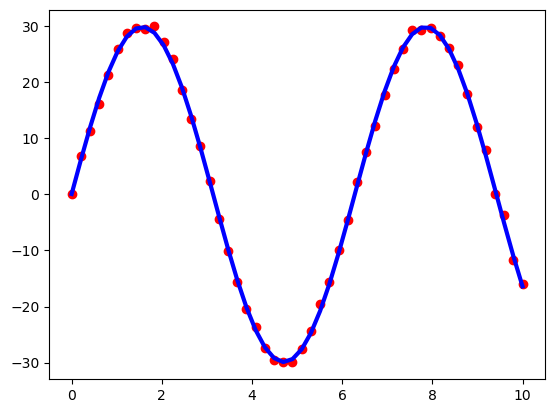

In [10]:
plt.plot(x,y,'ro')
plt.plot(x,yFit,'b-',lw=3)

In [13]:
spl=sp.interpolate.make_smoothing_spline(x,y,lam=0.1)
splD=spl.derivative()

In [51]:
yp=spl(x)

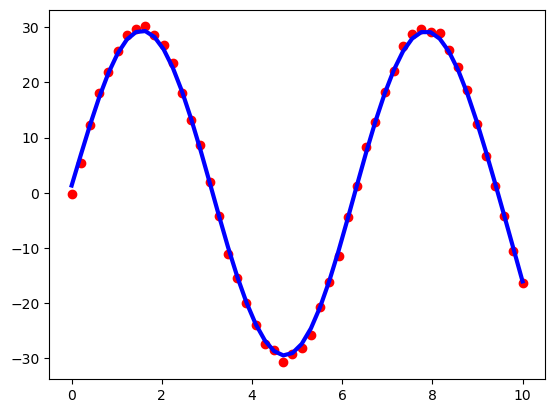

In [52]:
plt.plot(x,y,'ro')
plt.plot(x,yp,'b-',lw=3)

In [53]:
inter=sp.interpolate.make_interp_spline(x,y,k=5)

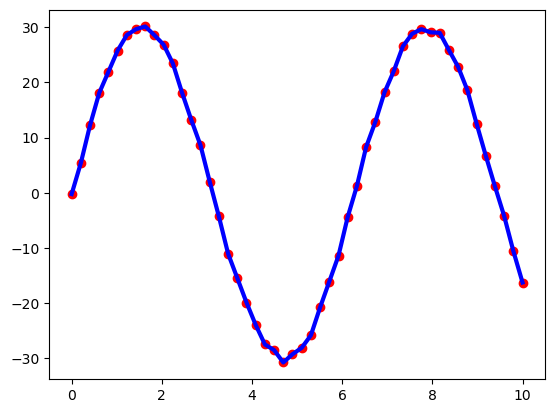

In [54]:
plt.plot(x,y,'ro')
plt.plot(x,inter(x),'b-',lw=3)

In [56]:
w=np.pi*2/(10/1.5)
w

0.9424777960769379

In [57]:
ans,cov=sp.optimize.curve_fit(f,x,y,[10,w,0])

In [58]:
ans

array([30.01425127,  0.9983705 , -1.55907381])

In [70]:
x=np.linspace(0,10,25)

In [79]:
y=10-5/(0.5+x)+np.random.normal(0,1,len(x))*0.3

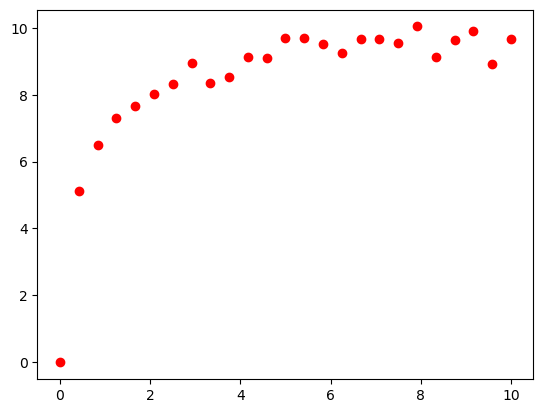

In [80]:
plt.plot(x,y,'ro')

In [81]:
z=np.polyfit(x,y,3)

In [82]:
p=np.poly1d(z)
p

poly1d([ 0.03002985, -0.58685165,  3.60659967,  2.56832933])

In [83]:
yp=p(x)

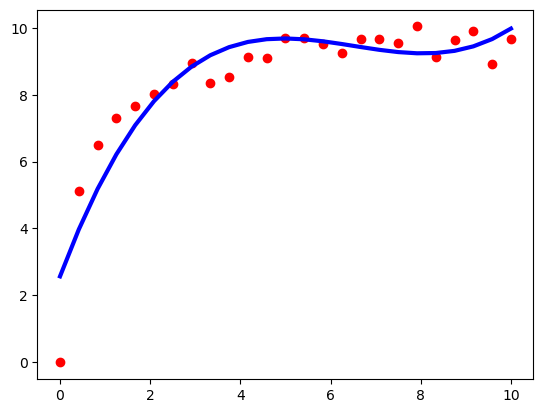

In [85]:
plt.plot(x,y,'ro')
plt.plot(x,yp,'b-',lw=3)

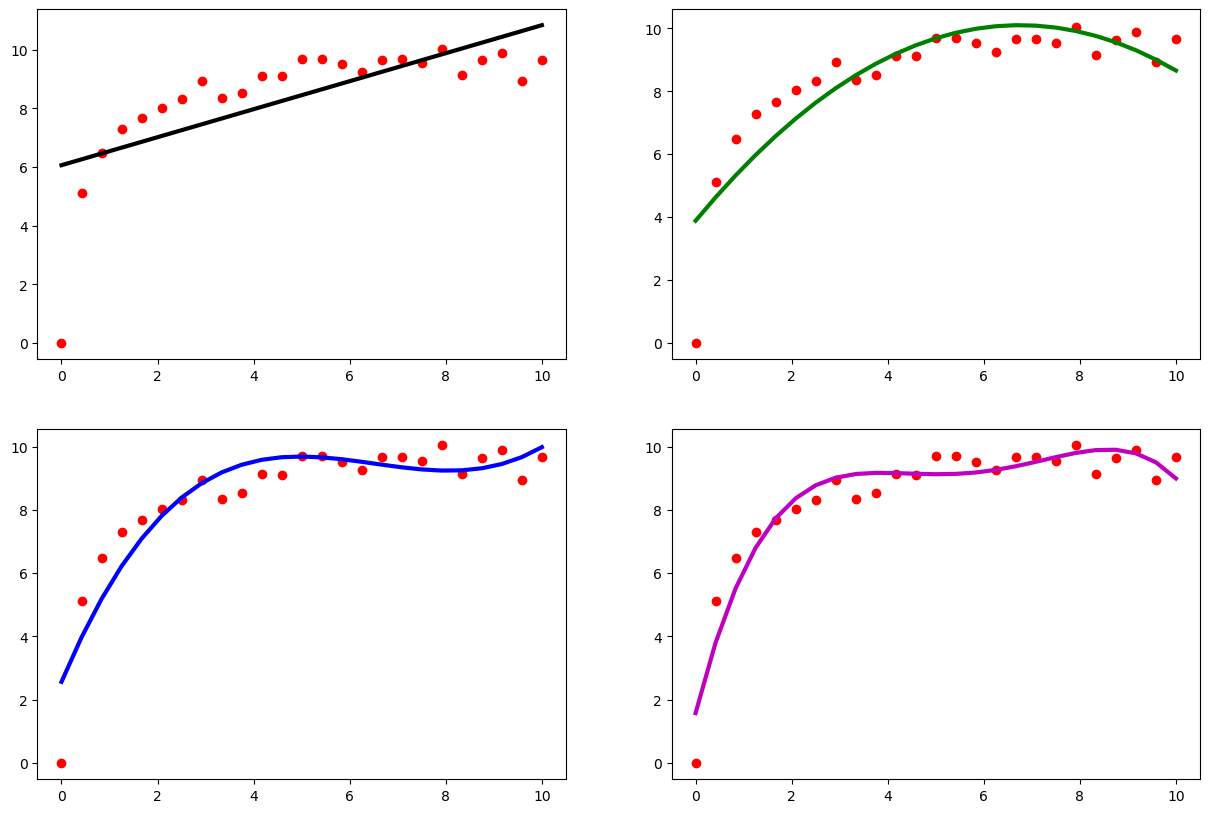

In [90]:
plt.figure(figsize=(15,10))

c='+kgbm'
for i in range(1,5):
    z=np.polyfit(x,y,i)
    p=np.poly1d(z)
    yp=p(x)
    plt.subplot(220+i)
    plt.plot(x,y,'ro')
    plt.plot(x,yp,c[i]+'-',lw=3)

In [91]:
f2=lambda x,a,b,c,d:a+b*x+c*x**2+d*x**3

In [92]:
ans,cov=sp.optimize.curve_fit(f2,x,y)

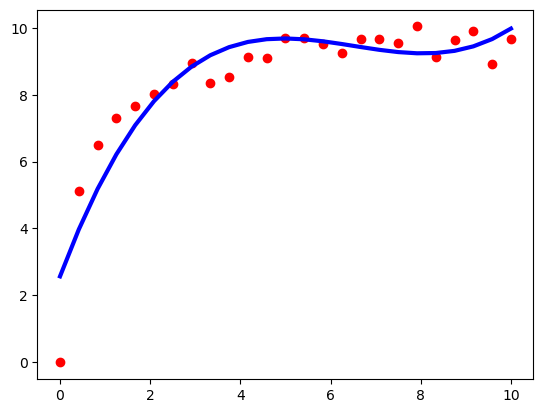

In [95]:
plt.plot(x,y,'ro')
plt.plot(x,f2(x,ans[0],ans[1],ans[2],ans[3]),'b-',lw=3)

In [94]:
ans

array([ 2.56832931,  3.60659969, -0.58685166,  0.03002985])

In [101]:
import sklearn as sk
from sklearn import *

In [103]:
line=sk.linear_model.LinearRegression()

In [105]:
X=np.array([x**i for i in range(4)]).T
line.fit(X,y)

LinearRegression()

In [106]:
t=np.linspace(0,10,500)


In [107]:
T=np.array([t**i for i in range(4)]).T
yp=line.predict(T)

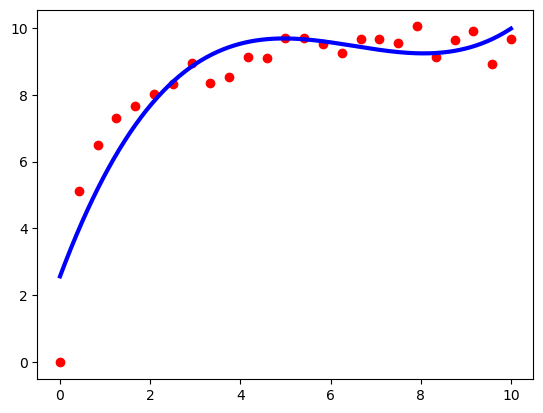

In [108]:
plt.plot(x,y,'ro')
plt.plot(t,yp,'b-',lw=3)